# Lecture 13 – Data Science


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Multiple Linear Regression

Let's load in a new dataset. This is aggregate per-player data from the 2018-19 NBA season, downloaded from [Kaggle](https://www.kaggle.com/schmadam97/nba-regular-season-stats-20182019).

In [104]:
nba = pd.read_csv(r'C:\Users\Muhammad_Talha\Downloads\COHORT 7\Week 1 + 2 + 3\Machine Learning\nba18-19_lec12.csv', index_col=0)
# Drops name of index (players are ordered by rank)
nba.index.name = None

In [105]:
nba.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


<br/>
We are interested in predicting the number of points (`PTS`) an athlete will score in a basketball game this season.

Suppose we want to fit a linear model by using some characteristics, or **feature**s of a player. Specifically, we'll focus on field goals, assists, and 3-point attempts.

- `FG`, the number of (2-point) field goals per game
- `AST`, the average number of assists per game, and
- `3PA`, the number of 3-point field goals attempted per game

This is how we express that model:

$$
\hat{y}
=
\theta_0 +
\theta_1 \cdot \textbf{FG} +
\theta_2 \cdot \textbf{AST} +
\theta_3 \cdot \textbf{3PA}
$$

In [106]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 1 to 530
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  708 non-null    object 
 1   Pos     708 non-null    object 
 2   Age     708 non-null    int64  
 3   Tm      708 non-null    object 
 4   G       708 non-null    int64  
 5   GS      708 non-null    int64  
 6   MP      708 non-null    float64
 7   FG      708 non-null    float64
 8   FGA     708 non-null    float64
 9   FG%     702 non-null    float64
 10  3P      708 non-null    float64
 11  3PA     708 non-null    float64
 12  3P%     661 non-null    float64
 13  2P      708 non-null    float64
 14  2PA     708 non-null    float64
 15  2P%     693 non-null    float64
 16  eFG%    702 non-null    float64
 17  FT      708 non-null    float64
 18  FTA     708 non-null    float64
 19  FT%     665 non-null    float64
 20  ORB     708 non-null    float64
 21  DRB     708 non-null    float64
 22  TR

In [107]:
# extract required Columns
e_nba = nba.loc[:,['FG','AST','3PA','PTS']]
e_nba

,FG,AST,3PA,PTS
1,1.8,0.6,4.1,5.3
2,0.4,0.8,1.5,1.7
3,1.1,1.9,2.2,3.2
4,6.0,1.6,0.0,13.9
5,3.4,2.2,0.2,8.9
...,...,...,...,...
528,4.0,0.8,0.0,11.5
529,3.1,0.9,0.0,7.8
530,3.6,1.1,0.0,8.9
530,3.4,0.8,0.0,8.5


<br/><br/>
In lecture, we saw that the predictions for the entire data set $\hat{\mathbb{Y}}$ can be computed as:

$$ \Large
\hat{\mathbb{Y}} = \mathbb{X} \theta  
$$

The **design matrix** $\mathbb{X} \in \mathbb{R}^{n,d+1}$ has $n$ rows corresponding to each record in the dataset and $d+1$ columns corresponding to the original $d$ columns in the data plus an additional 1s column vector (**bias/intercept feature**).

Let's build this design matrix using Pandas:

In [108]:
# insert bias term with dataframe
e_nba.insert(0,'Bias',1)
e_nba

,Bias,FG,AST,3PA,PTS
1,1,1.8,0.6,4.1,5.3
2,1,0.4,0.8,1.5,1.7
3,1,1.1,1.9,2.2,3.2
4,1,6.0,1.6,0.0,13.9
5,1,3.4,2.2,0.2,8.9
...,...,...,...,...,...
528,1,4.0,0.8,0.0,11.5
529,1,3.1,0.9,0.0,7.8
530,1,3.6,1.1,0.0,8.9
530,1,3.4,0.8,0.0,8.5


In [111]:
# the data shape
e_nba = e_nba.loc[:,['Bias','FG','AST','3PA']]
e_nba.shape


(708, 4)

While we're at it, let's build the $\mathbb{Y}$ vector of our true `PTS` values.

In [112]:
# For nba data
# how many observations
# visualize few
n = e_nba.shape[0]
print('number of datapoints ', n)

y = nba['PTS'].values
y = y.reshape(-1,1)
y[:5]

number of datapoints  708


array([[ 5.3],
       [ 1.7],
       [ 3.2],
       [13.9],
       [ 8.9]])

---
## Example prediction

Suppose we decide to pick an arbitrary parameter $\theta$:

$$\theta = \begin{bmatrix}0.50 \\ -0.14 \\ 0.65 \\ 1.52 \end{bmatrix}$$

(For those interested: I drew these from random values simulated from a standard normal distribution using `np.random.randn`.)

In [113]:
theta_arbitrary = np.array([[0.5], [-1.14], [0.65], [1.52]])
theta_arbitrary

array([[ 0.5 ],
       [-1.14],
       [ 0.65],
       [ 1.52]])

For this value of $\theta$ we can make a prediction using our model with matrix multiplication.

The `@` symbol is the matrix multiply operation and is equivalent to writing `xt.dot(theta)`.

In [114]:
# apply the above random values on 'X' and predict 'y'
X = e_nba.values
X

Y_hat = X @ theta_arbitrary
Y_hat[:5], y[:5]

(array([[ 5.07 ],
        [ 2.844],
        [ 3.825],
        [-5.3  ],
        [-1.642]]),
 array([[ 5.3],
        [ 1.7],
        [ 3.2],
        [13.9],
        [ 8.9]]))

## Computing MSE

For Ordinary Least Squares, the average loss is MSE:

$$ \Large R(\theta) = \frac{1}{n} || \mathbb{Y} - \mathbb{X}\theta||^2_2 $$

NumPy has a handy function `np.linalg.norm` that computes the norm of a matrix (default is L2 norm).

In [126]:
theta_arbitrary = np.array([0.5, -1.14, 0.65, 1.52])
def mse_nba(theta):
    """
    Y is PTS
    X is intercept, FG, AST, 3PA
    """
    # compute MSE
    mse = np.linalg.norm(y-X @ theta)**2/n
    return mse

mse_nba(theta_arbitrary)

57637.90184547457

Is this good? Is this bad? Let's compute the optimal theta and compare!

---
## Implementing Least Squares

From lecture, the Least Squares Estimate $\hat{\theta}$ is:
$$
\Large \hat{\theta} = \left( \mathbb{X}^{\top} \mathbb{X} \right)^{-1} \mathbb{X}^{\top} \mathbb{Y}
$$

While it is not as numerically stable or efficient. We can compute $\hat{\theta}$ by direction using matrix inversion. To do this, we import the `inv` function for the `numpy` linear algebra library:

In [127]:
from numpy.linalg import inv

In [128]:
def least_squares_estimate(X, Y):
    theta_hat = inv(X.T @ X) @ X.T @ y
    # code here
    return theta_hat

theta_hat = least_squares_estimate(X, y)
theta_hat

array([[-0.29253798],
       [ 2.51705703],
       [ 0.05075571],
       [ 0.31307653]])

In [129]:
print("Arbitrary theta MSE: ", mse_nba(theta_arbitrary))
print("Optimal theta MSE:"  , mse_nba(theta_hat))

Arbitrary theta MSE:  57637.90184547457
Optimal theta MSE: 0.3963133329080335


Nice!!!

---
## Making Least Squares Predictions

Now that we have estimated the model parameters $\hat{\theta}$ we can now also predict the points scored $\hat{\mathbb{Y}}$ for each of our players.

In [130]:
Y_hat = X @ theta_hat

<br/>

---

## Model Performance/Diagnosing the Model

In previous lectures, we have plotted the residual vs. our single input feature $x$.

For higher dimensional regression models, we often graph the residual with respect to the fitted values $\hat{y}$.

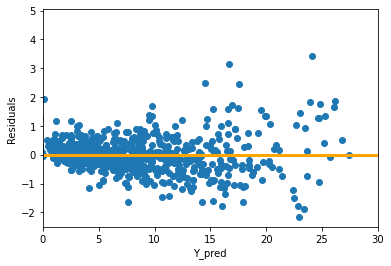

In [133]:
# code here
Y_pred = X @ theta_hat
residuals = y - Y_hat

plt.scatter(Y_pred, residuals, alpha=1)
plt.axhline(0, color='orange', linestyle='-', linewidth = 3)
plt.xlabel('Y_pred')
plt.ylabel('Residuals')
plt.xlim(0, 30)
plt.show()

Overall while the residuals are roughly centered around 0 ($\hat{y} = y$), we see **heteroskedasticity**: Our regression spread is uneven, particularly as predictions get big.

## Multiple $R^2$

Let's compute the coefficient of determination, or **multiple $R^2$**, for our model.

In [135]:
# code here
import numpy as np
SS_res = np.sum((y - Y_hat) ** 2)
SS_tot = np.sum((y - np.mean(y)) ** 2)

R_squared = 1 - (SS_res / SS_tot)
print(R_squared)


0.9883162128703227


That's super high!!! Wait, what's up with that?

(Hint: Basketball facts)

Let's try reducing the number of features to see how this Multiple $R^2$ metric changes.

In [139]:
# Use intercept, AST, 3PA
e_nba_reduced = e_nba.loc[:, ['Bias', 'AST', '3PA']]
X_reduced = e_nba_reduced.values
X_reduced

array([[1. , 0.6, 4.1],
       [1. , 0.8, 1.5],
       [1. , 1.9, 2.2],
       ...,
       [1. , 1.1, 0. ],
       [1. , 0.8, 0. ],
       [1. , 1.5, 0. ]])

In [141]:
theta_hat_reduced = least_squares_estimate(X_reduced, y)
Y_hat_reduced = X_reduced @ theta_hat_reduced

SS_res_reduced = np.sum((y - Y_hat_reduced) ** 2)
SS_tot_reduced = np.sum((y - np.mean(y)) ** 2)
R_squared_reduced = 1 - (SS_res_reduced / SS_tot_reduced)

print(R_squared_reduced)

0.6087862763665718


In [144]:
# Use intercept, AST only (SLR)
e_nba_slr = e_nba.loc[:, ['Bias', 'AST']]
X_slr = e_nba_slr.values
X_slr

In [145]:
theta_hat_slr = least_squares_estimate(X_slr, y)
Y_hat_slr = X_slr @ theta_hat_slr

SS_res_slr = np.sum((y - Y_hat_slr) ** 2)
SS_tot_slr = np.sum((y - np.mean(y)) ** 2)
R_squared_slr = 1 - (SS_res_slr / SS_tot_slr)

print(R_squared_slr)

0.45700555079685967


In [150]:
theta_ast_only = theta_hat_slr
theta_ast_only

array([[3.98332315],
       [2.39888152]])

In [151]:
theta_hat

array([[-0.29253798],
       [ 2.51705703],
       [ 0.05075571],
       [ 0.31307653]])

Comparing these Multiple $R^2$ together:

In [153]:
print("(SLR) intercept, AST:    ", R_squared_slr)
print("intercept, 3PA, AST:     ", R_squared_reduced)
print("intercept, FG, 3PA, AST: ", R_squared)

(SLR) intercept, AST:     0.45700555079685967
intercept, 3PA, AST:      0.6087862763665718
intercept, FG, 3PA, AST:  0.9883162128703227


Because of how basketball is scored, knowing Field Goals `FG` *and* 3 point goal attempts `3PA` will reliably tell you how many total points a player scored in that game. This is assuming NBA players make a good number of their 3 pointers.

Side note, if you wanted to check that Multiple R^2 for Simple Linear Regression is indeed correlation coefficient $r^2$:

In [154]:
r = np.corrcoef(nba['AST'], nba['PTS'])[0,1]
r ** 2

0.4570055507968598